<font size="+3.8">Scanpy single-cell pre-processing</font>  
<font size="+1.5"></font>  

sfrerich

Aim: Preprocess mouse brain single-cell data from Winkler 2022 Science (human adult brain - healthy controls only)  
Publication: https://pubmed.ncbi.nlm.nih.gov/35084939/

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
import os
from datetime import date
from matplotlib.pyplot import rc_context

In [2]:
sc.settings.verbosity = 3

In [3]:
main_dir='/run/user/1000/gvfs/smb-share:server=138.245.4.35,share=bd-dichgans/SF' # Linux

In [4]:
main_dir='\\\isdsynnas.srv.med.uni-muenchen.de\BD-Dichgans\SF' # Win

In [5]:
main_dir='/Volumes/BD-Dichgans/SF' # Mac

# Load data

## Annotated 
Downloaded from: https://cells.ucsc.edu/?bp=brain&dis=Healthy~Healthy+Control&org=Human+(H.+sapiens)&ds=adult-brain-vasc

### EC dataset

In [ ]:
ad = sc.read_text(main_dir+"\\P6_vasc_scRNAseq\\Winkler2022\\ucsc_cellbrowser_data\\EC\\exprMatrix.tsv.gz").transpose()
original_cellnames = ad.obs

In [8]:
ad = sc.read_text(main_dir+"//P6_vasc_scRNAseq//Winkler2022//ucsc_cellbrowser_data//EC//exprMatrix.tsv.gz").transpose()
original_cellnames = ad.obs

In [6]:
meta = pd.read_csv(main_dir+"\\P6_vasc_scRNAseq\\Winkler2022\\ucsc_cellbrowser_data\\EC\\meta.tsv", sep="\t")
ad.obs = meta
ad

AnnData object with n_obs × n_vars = 5018 × 29492
    obs: 'Cell', 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined', 'nFeature_combined', 'percent.mt', 'doublet2', 'doublet3', 'softmax', 'nCount_SCT', 'nFeature_SCT', 'clusters', 'Art_UCell', 'Cap_UCell', 'Venous_UCell', 'Venule_UCell', 'Cluster'

In [9]:
meta = pd.read_csv(main_dir+"//P6_vasc_scRNAseq//Winkler2022//ucsc_cellbrowser_data//EC//meta.tsv", sep="\t")
ad.obs = meta
ad

AnnData object with n_obs × n_vars = 5018 × 29492
    obs: 'Cell', 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined', 'nFeature_combined', 'percent.mt', 'doublet2', 'doublet3', 'softmax', 'nCount_SCT', 'nFeature_SCT', 'clusters', 'Art_UCell', 'Cap_UCell', 'Venous_UCell', 'Venule_UCell', 'Cluster'

In [10]:
ad.obs.columns

Index(['Cell', 'orig.ident', 'nCount_spliced', 'nFeature_spliced',
       'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined',
       'nFeature_combined', 'percent.mt', 'doublet2', 'doublet3', 'softmax',
       'nCount_SCT', 'nFeature_SCT', 'clusters', 'Art_UCell', 'Cap_UCell',
       'Venous_UCell', 'Venule_UCell', 'Cluster'],
      dtype='object')

In [11]:
ad.obs.head(2)

,Cell,orig.ident,nCount_spliced,nFeature_spliced,nCount_unspliced,nFeature_unspliced,Sample,nCount_combined,nFeature_combined,percent.mt,...,doublet3,softmax,nCount_SCT,nFeature_SCT,clusters,Art_UCell,Cap_UCell,Venous_UCell,Venule_UCell,Cluster
0,GGTGTCGTCAACTGAC_9,ctrl085_L,38258.9096,5725,23647.0904,5208,CTRL085,61906.0,8533,8.001521,...,Singlet,0.022721,5530,2441,Venous,0.348467,0.291344,0.824233,0.095844,Venous
1,TCATTCAAGACGCTCC_9,ctrl085_L,43172.4200,6623,25432.5800,5587,CTRL085,68605.0,9549,8.604769,...,Singlet,0.006188,5127,2498,Art1,0.701656,0.210244,0.223356,0.061833,Art1


In [12]:
assert(all(ad.obs["Cell"] == original_cellnames.index))

In [13]:
ad.obs["Sample"].unique()

array(['CTRL085', 'CTRL086', 'CTRL099_21', 'CTRL099_22', 'CTRL12'],
      dtype=object)

In [ ]:
# add umap coords
umap = pd.read_csv(main_dir+"\\P6_vasc_scRNAseq\\Winkler2022\\ucsc_cellbrowser_data\\EC\\Seurat_umap.coords.tsv.gz", sep="\t", header=None)
ad.obsm['X_umap'] = umap[[1,2]].to_numpy()

In [15]:
# add umap coords
umap = pd.read_csv(main_dir+"//P6_vasc_scRNAseq//Winkler2022//ucsc_cellbrowser_data//EC//Seurat_umap.coords.tsv.gz", sep="\t", header=None)
ad.obsm['X_umap'] = umap[[1,2]].to_numpy()

In [16]:
ad = ad[(ad.obs.doublet2 != 'Doublet') & (ad.obs.doublet3 != 'Doublet')] # remove doublets

In [17]:
del ad.obs['clusters']

In [18]:
ad.obs['Cluster']

0       Venous
1         Art1
2       Venous
3       Venous
4       Venous
         ...  
5013       Cap
5014    Venule
5015      Art2
5016    Venule
5017       Cap
Name: Cluster, Length: 4950, dtype: object

In [19]:
ad.obs["clusters2"] = 'ECs_' + ad.obs['Cluster'].astype(str)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_30628/950043674.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs["clusters2"] = 'ECs_' + ad.obs['Cluster'].astype(str)
/Users/simonf/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [20]:
ad.obs["clusters2"] = 'ECs_' + ad.obs['Cluster'].astype(str)

In [21]:
ad.obs['clusters2'].unique()

array(['ECs_Venous', 'ECs_Art1', 'ECs_Art3', 'ECs_Cap', 'ECs_Art2',
       'ECs_Venule'], dtype=object)

In [22]:
# merge subclusters
new_names = {
    'ECs_Arterial': {'ECs_Art1','ECs_Art2','ECs_Art3'},
    'ECs_Capillary': {'ECs_Cap'},
    'ECs_Venous': {'ECs_Venous','ECs_Venule'},
    'Pericytes': {'PC'},
    'SMCs': {'aSMC','aaSMC','vSMC'},
    'Oligos': {'OL'},
    'Fibroblasts': {'FB1', 'FB2'},
    'Microglia': {'MG'},
    'Astrocytes': {'AC'}
}
# re-format
result = {}
for key, value in new_names.items():
    for elem in value:
        result[(elem)] = key
new_cluster_names = dict(sorted(result.items()))
print(new_cluster_names)

{'AC': 'Astrocytes', 'ECs_Art1': 'ECs_Arterial', 'ECs_Art2': 'ECs_Arterial', 'ECs_Art3': 'ECs_Arterial', 'ECs_Cap': 'ECs_Capillary', 'ECs_Venous': 'ECs_Venous', 'ECs_Venule': 'ECs_Venous', 'FB1': 'Fibroblasts', 'FB2': 'Fibroblasts', 'MG': 'Microglia', 'OL': 'Oligos', 'PC': 'Pericytes', 'aSMC': 'SMCs', 'aaSMC': 'SMCs', 'vSMC': 'SMCs'}


In [23]:
# fine annotation
ad.obs['clusters2'] = (
    ad.obs['clusters2']
    .map(new_cluster_names)
    .astype('category')
)

In [24]:
ad.obs['clusters2'].unique()

['ECs_Venous', 'ECs_Arterial', 'ECs_Capillary']
Categories (3, object): ['ECs_Arterial', 'ECs_Capillary', 'ECs_Venous']

In [25]:
ad.obs['clusters'] = "ECs"

/Users/simonf/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


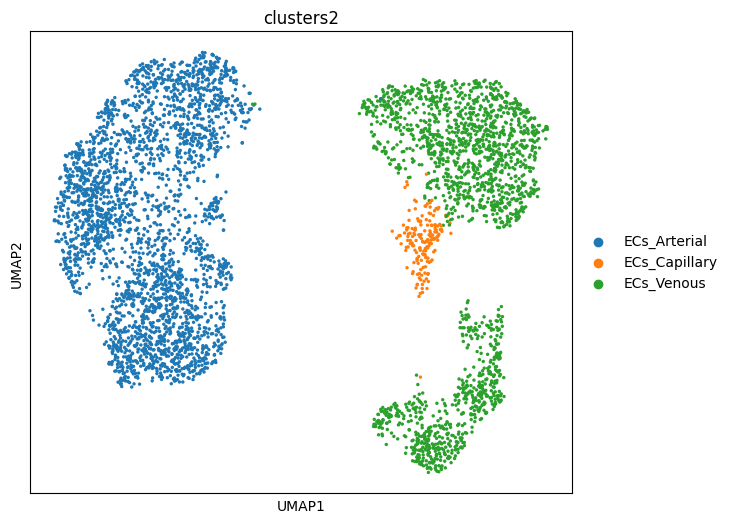

In [26]:
with rc_context({'figure.figsize': (7, 6)}):
    sc.pl.umap(ad, color=['clusters2'])

Check if data is normalized:

In [27]:
ad.layers

Layers with keys: 

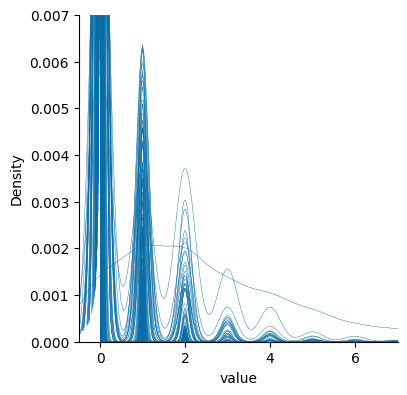

In [28]:
# show expression of 100 random genes (across all spots)
import random
import seaborn as sns
random_genes=random.sample(range(0, ad.X.shape[1]), 100)
adata_sub = ad[:,random_genes]
exp=pd.DataFrame(np.matrix(adata_sub.X))
# plot
pl1=sns.displot(data=pd.melt(exp),x='value',height=4,hue='variable',kind="kde",warn_singular=False,legend=False,palette=list(np.repeat('#086da6',100)), lw=0.3) # genes with 0 expression are excluded
pl1.set(xlim=(-0.5, 7),ylim=(0,0.007));
plt.show()

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_30628/3027945264.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)))


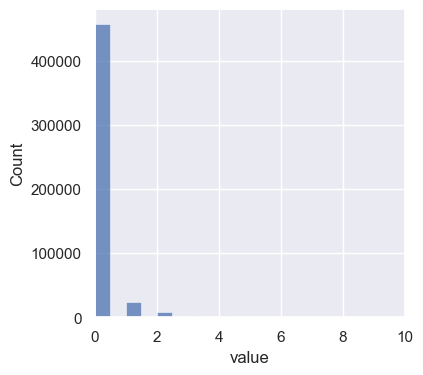

In [29]:
sns.set(rc={'figure.figsize':(4,4)})
pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)))
pl.set(xlim=(0, 10));
sns.set_style("ticks")
plt.show()

Data is not normalized, therefore normalize and log-transform

In [30]:
ad.layers["counts"] = ad.X.copy() # save unnormalized raw RNA counts - retrieve via ad.X = ad.layers["counts"]

In [31]:
sc.pp.normalize_total(ad, inplace=True) # Normalize each spot by total counts over all genes, so that every spot has the same total count after normalization.

normalizing counts per cell
    finished (0:00:00)


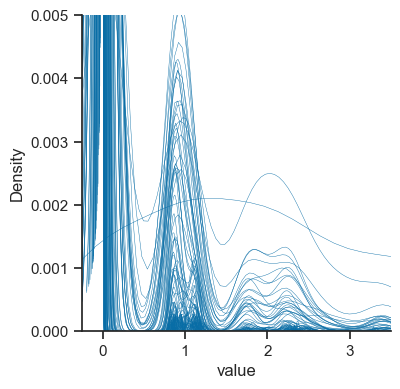

In [32]:
# show expression of 100 random genes (across all spots)
adata_sub = ad[:,random_genes]
exp=pd.DataFrame(np.matrix(adata_sub.X))
# plot
pl=sns.displot(data=pd.melt(exp),x='value',height=4,hue='variable',kind="kde",warn_singular=False,legend=False,palette=list(np.repeat('#086da6',100)), lw=0.3) # genes with 0 expression are excluded
pl.set(xlim=(-0.25, 3.5),ylim=(0,0.005))
plt.show()

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_30628/2747832379.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)))


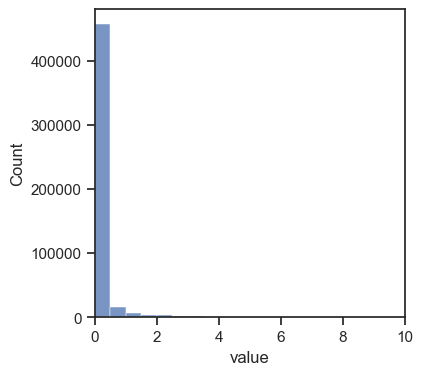

In [33]:
pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)))
pl.set(xlim=(0, 10))
plt.show()

In [34]:
sc.pp.log1p(ad) # X = log(X + 1)

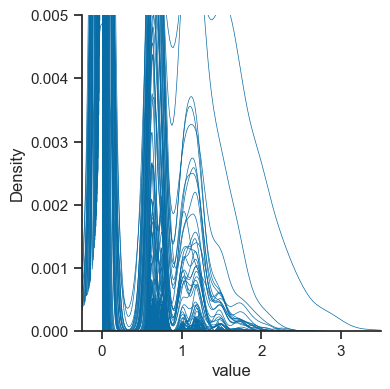

In [35]:
# show expression of 100 random genes (across all spots)
adata_sub = ad[:,random_genes]
exp=pd.DataFrame(np.matrix(adata_sub.X))
# plot
pl=sns.displot(data=pd.melt(exp),x='value',height=4,hue='variable',kind="kde",warn_singular=False,legend=False,palette=list(np.repeat('#086da6',100)), lw=0.5) # genes with 0 expression are excluded
pl.set(xlim=(-0.25, 3.5),ylim=(0,0.005));
plt.show()

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_30628/2170774648.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)));


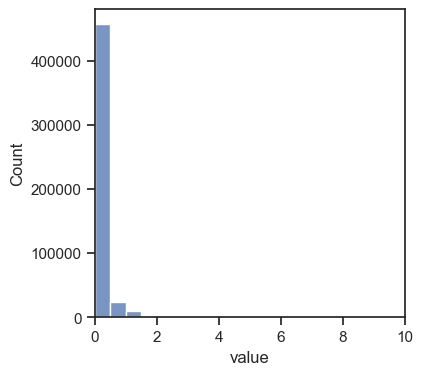

In [36]:
pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)));
pl.set(xlim=(0, 10));
plt.show()

In [37]:
ad.layers["normalized"] = ad.X.copy() # save normalized + log-transformed (but unscaled) counts - retrieve via adata.X = adata.layers["normalized"]

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


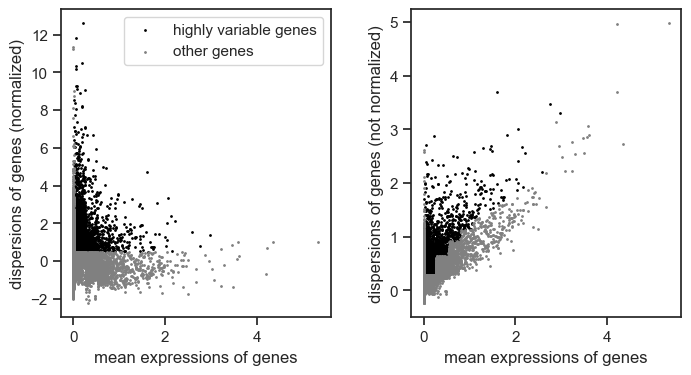

In [38]:
# Identify highly-variable genes
sc.pp.highly_variable_genes(ad)
sc.pl.highly_variable_genes(ad)

In [39]:
ad

AnnData object with n_obs × n_vars = 4950 × 29492
    obs: 'Cell', 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined', 'nFeature_combined', 'percent.mt', 'doublet2', 'doublet3', 'softmax', 'nCount_SCT', 'nFeature_SCT', 'Art_UCell', 'Cap_UCell', 'Venous_UCell', 'Venule_UCell', 'Cluster', 'clusters2', 'clusters'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters2_colors', 'log1p', 'hvg'
    obsm: 'X_umap'
    layers: 'counts', 'normalized'

In [40]:
ad.layers

Layers with keys: counts, normalized

In [41]:
winkler_ec = ad

In [42]:
del ad

### Perivascular dataset

In [ ]:
ad = sc.read_text(main_dir+"\\P6_vasc_scRNAseq\\Winkler2022\\ucsc_cellbrowser_data\\Perivascular\\exprMatrix.tsv.gz").transpose()
original_cellnames = ad.obs

In [43]:
ad = sc.read_text(main_dir+"//P6_vasc_scRNAseq//Winkler2022//ucsc_cellbrowser_data//Perivascular//exprMatrix.tsv.gz").transpose()
original_cellnames = ad.obs

In [ ]:
meta = pd.read_csv(main_dir+"\\P6_vasc_scRNAseq\\Winkler2022\\ucsc_cellbrowser_data\\Perivascular\\meta.tsv", sep="\t")
ad.obs = meta
ad

In [44]:
meta = pd.read_csv(main_dir+"//P6_vasc_scRNAseq//Winkler2022//ucsc_cellbrowser_data//Perivascular//meta.tsv", sep="\t")
ad.obs = meta
ad

AnnData object with n_obs × n_vars = 49553 × 36138
    obs: 'cellId', 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined', 'nFeature_combined', 'percent.mt', 'softmax', 'nCount_SCT', 'nFeature_SCT', 'clusters', 'FBMC_score', 'SMC_score', 'FB_score', 'PC_score', 'sub_clusters'

In [45]:
ad.obs.columns

Index(['cellId', 'orig.ident', 'nCount_spliced', 'nFeature_spliced',
       'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined',
       'nFeature_combined', 'percent.mt', 'softmax', 'nCount_SCT',
       'nFeature_SCT', 'clusters', 'FBMC_score', 'SMC_score', 'FB_score',
       'PC_score', 'sub_clusters'],
      dtype='object')

In [46]:
ad.obs.head(2)

,cellId,orig.ident,nCount_spliced,nFeature_spliced,nCount_unspliced,nFeature_unspliced,Sample,nCount_combined,nFeature_combined,percent.mt,softmax,nCount_SCT,nFeature_SCT,clusters,FBMC_score,SMC_score,FB_score,PC_score,sub_clusters
0,GCGTGCACAATCCTTT_9,ctrl085_L,45786.477119,6851,18618.522899,5258,CTRL085,64405.000018,9527,8.891061,0.003459,5009,2365,FBMC,0.853494,-0.115504,0.312556,0.014801,FBMC2
1,TCGGTCTCACATAACC_9,ctrl085_L,58604.482805,7658,22669.517186,5735,CTRL085,81273.999990,10382,8.676364,0.006037,5001,2388,FBMC,1.030248,0.097485,0.466670,0.020408,FBMC2


In [47]:
assert(all(ad.obs["cellId"] == original_cellnames.index))

In [48]:
ad.obs["Sample"].unique()

array(['CTRL085', 'CTRL086', 'CTRL099_21', 'CTRL099_22', 'CTRL12'],
      dtype=object)

In [ ]:
# add umap coords
umap = pd.read_csv(main_dir+"\\P6_vasc_scRNAseq\\Winkler2022\\ucsc_cellbrowser_data\\Perivascular\\UMAP.coords.tsv.gz", sep="\t", header=None)
ad.obsm['X_umap'] = umap[[1,2]].to_numpy()

In [49]:
# add umap coords
umap = pd.read_csv(main_dir+"//P6_vasc_scRNAseq//Winkler2022//ucsc_cellbrowser_data//Perivascular//UMAP.coords.tsv.gz", sep="\t", header=None)
ad.obsm['X_umap'] = umap[[1,2]].to_numpy()

In [50]:
# no doublets defined in obs
# ad = ad[(ad.obs.doublet2 != 'Doublet') & (ad.obs.doublet3 != 'Doublet')] # remove doublets

In [51]:
# Renaming
old_to_new = {'FB':'Fibroblasts','FBMC':'Fibromyocytes','PC':'Pericytes','SMC':'SMCs'}
ad.obs['clusters2'] = (
    ad.obs['clusters'].map(old_to_new).astype('category')
)

/Users/simonf/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


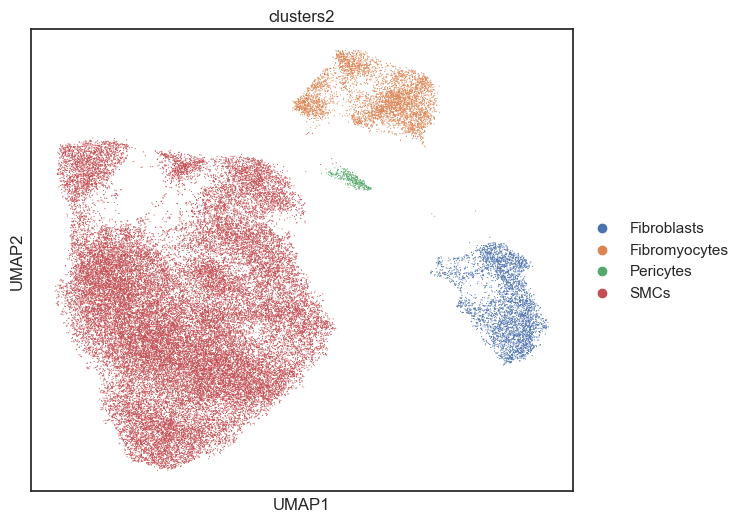

In [52]:
with rc_context({'figure.figsize': (7, 6)}):
    sc.pl.umap(ad, color=['clusters2'])

Check if data is normalized:

In [53]:
ad.layers

Layers with keys: 

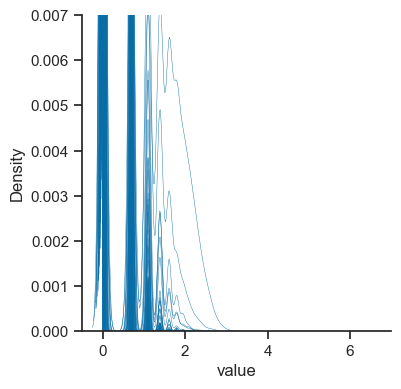

In [54]:
# show expression of 100 random genes (across all spots)
import random
import seaborn as sns
random_genes=random.sample(range(0, ad.X.shape[1]), 100)
adata_sub = ad[:,random_genes]
exp=pd.DataFrame(np.matrix(adata_sub.X))
# plot
pl1=sns.displot(data=pd.melt(exp),x='value',height=4,hue='variable',kind="kde",warn_singular=False,legend=False,palette=list(np.repeat('#086da6',100)), lw=0.3) # genes with 0 expression are excluded
pl1.set(xlim=(-0.5, 7),ylim=(0,0.007));
sns.set_style("ticks")
plt.show()

In [55]:
exp.iloc[0:5,0:30]

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.000000,0.0,0.0,0.0,0.0,1.79176,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,1.94591,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.693147,0.0,0.0,0.0,0.0,1.79176,0.0,0.0,0.0,...,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,1.38629,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,1.94591,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Note: Matrix is apparently log-transformed. Also see https://github.com/cnk113/vascular-analysis/issues/1.

In [56]:
# reverse log-transformation ln(x+1)
import math
ad.layers["counts"] = (math.e**(ad.X))-1

In [57]:
ad.layers["log?"] = ad.X

In [58]:
ad.X = ad.layers["counts"]

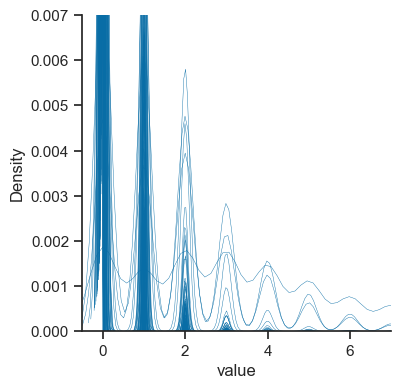

In [59]:
# show expression of 100 random genes (across all spots)
import random
import seaborn as sns
random_genes=random.sample(range(0, ad.X.shape[1]), 100)
adata_sub = ad[:,random_genes]
exp=pd.DataFrame(np.matrix(adata_sub.X))
# plot
pl1=sns.displot(data=pd.melt(exp),x='value',height=4,hue='variable',kind="kde",warn_singular=False,legend=False,palette=list(np.repeat('#086da6',100)), lw=0.3) # genes with 0 expression are excluded
pl1.set(xlim=(-0.5, 7),ylim=(0,0.007));
plt.show()

In [60]:
exp.iloc[0:5,0:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_30628/2170774648.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)));


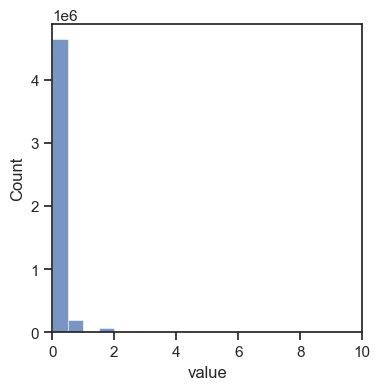

In [61]:
pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)));
pl.set(xlim=(0, 10));
plt.show()

Now normalize and log-transform

In [62]:
ad.layers["counts"] = ad.X.copy() # save unnormalized raw RNA counts - retrieve via ad.X = ad.layers["counts"]

In [63]:
sc.pp.normalize_total(ad, inplace=True) # Normalize each cell by total counts over all genes, so that every cell has the same total count after normalization.

normalizing counts per cell
    finished (0:00:00)


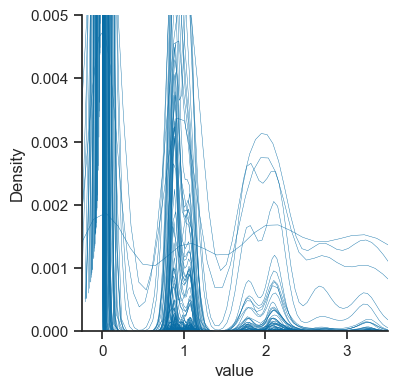

In [64]:
# show expression of 100 random genes (across all spots)
adata_sub = ad[:,random_genes]
exp=pd.DataFrame(np.matrix(adata_sub.X))
# plot
pl=sns.displot(data=pd.melt(exp),x='value',height=4,hue='variable',kind="kde",warn_singular=False,legend=False,palette=list(np.repeat('#086da6',100)), lw=0.3) # genes with 0 expression are excluded
pl.set(xlim=(-0.25, 3.5),ylim=(0,0.005))
sns.set_style("ticks")
plt.show()

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_30628/2374675468.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)))


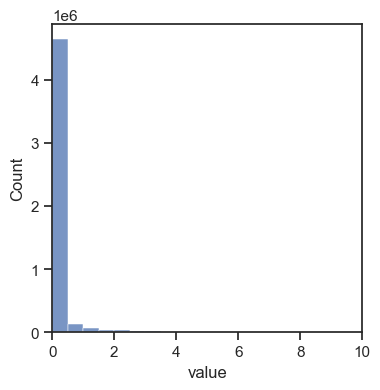

In [65]:
pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)))
pl.set(xlim=(0, 10))
sns.set_style("ticks")
plt.show()

In [66]:
sc.pp.log1p(ad) # X = log(X + 1)

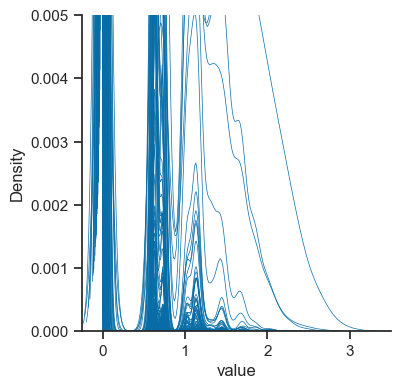

In [67]:
# show expression of 100 random genes (across all spots)
adata_sub = ad[:,random_genes]
exp=pd.DataFrame(np.matrix(adata_sub.X))
# plot
pl=sns.displot(data=pd.melt(exp),x='value',height=4,hue='variable',kind="kde",warn_singular=False,legend=False,palette=list(np.repeat('#086da6',100)), lw=0.5) # genes with 0 expression are excluded
pl.set(xlim=(-0.25, 3.5),ylim=(0,0.005));
plt.show()

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_30628/2170774648.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)));


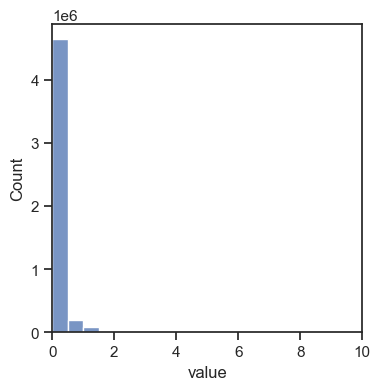

In [68]:
pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)));
pl.set(xlim=(0, 10));
plt.show()

In [69]:
ad.layers["normalized"] = ad.X.copy() # save normalized + log-transformed (but unscaled) counts - retrieve via adata.X = adata.layers["normalized"]

extracting highly variable genes
    finished (0:02:30)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


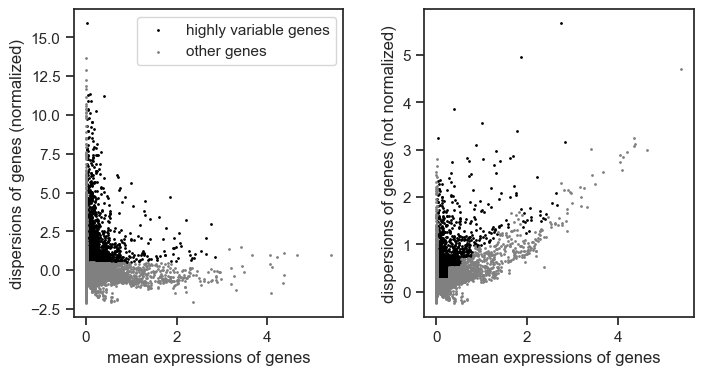

In [70]:
# Identify highly-variable genes
sc.pp.highly_variable_genes(ad)
sc.pl.highly_variable_genes(ad)

In [71]:
ad

AnnData object with n_obs × n_vars = 49553 × 36138
    obs: 'cellId', 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined', 'nFeature_combined', 'percent.mt', 'softmax', 'nCount_SCT', 'nFeature_SCT', 'clusters', 'FBMC_score', 'SMC_score', 'FB_score', 'PC_score', 'sub_clusters', 'clusters2'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters2_colors', 'log1p', 'hvg'
    obsm: 'X_umap'
    layers: 'counts', 'log?', 'normalized'

In [72]:
ad.layers

Layers with keys: counts, log?, normalized

In [73]:
ad.obs["clusters"] = ad.obs["clusters2"]

In [74]:
winkler_pv = ad

### Merge

In [75]:
# free memory
del winkler_pv.layers["log?"]
del winkler_pv.layers["counts"]
del winkler_ec.layers["counts"]

In [76]:
del winkler_pv.uns
del winkler_ec.uns

In [77]:
del ad
del exp
del adata_sub
del random_genes

In [78]:
# merge winkler datasets
# ignore potential batch effects because dataset is pre-annotated
adata = anndata.concat([winkler_ec, winkler_pv], join="inner") 

# Standard pipeline

Skip, because data is pre-analyzed.

# Vascular marker genes

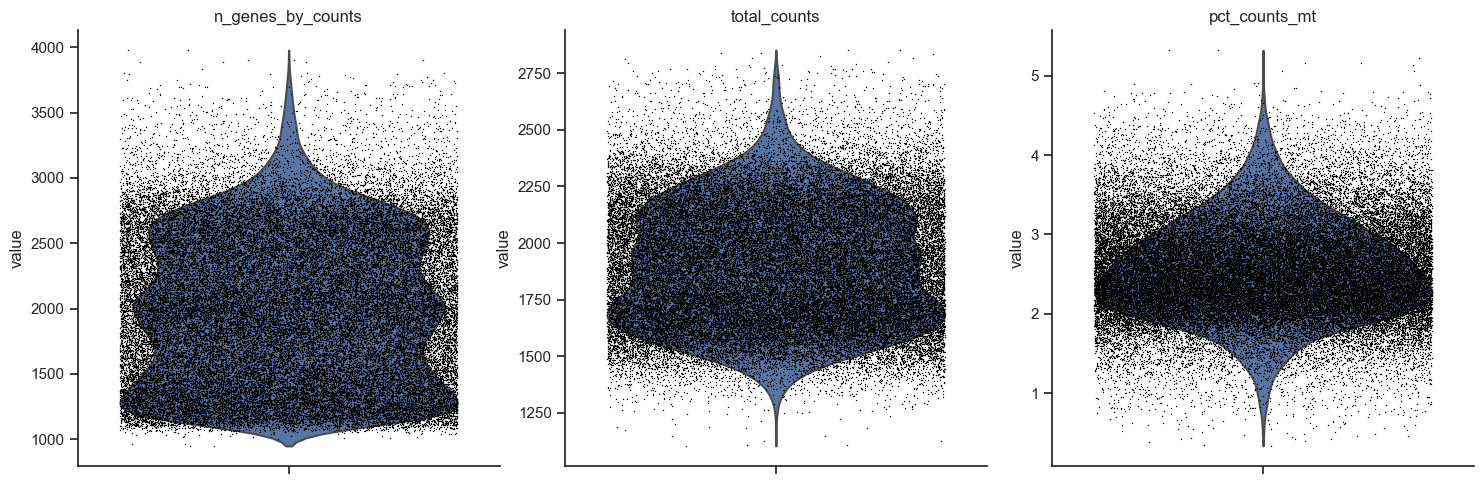

In [79]:
# Basic QC metrics
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)

In [80]:
sc.tl.rank_genes_groups(adata, 'clusters', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:02:59)


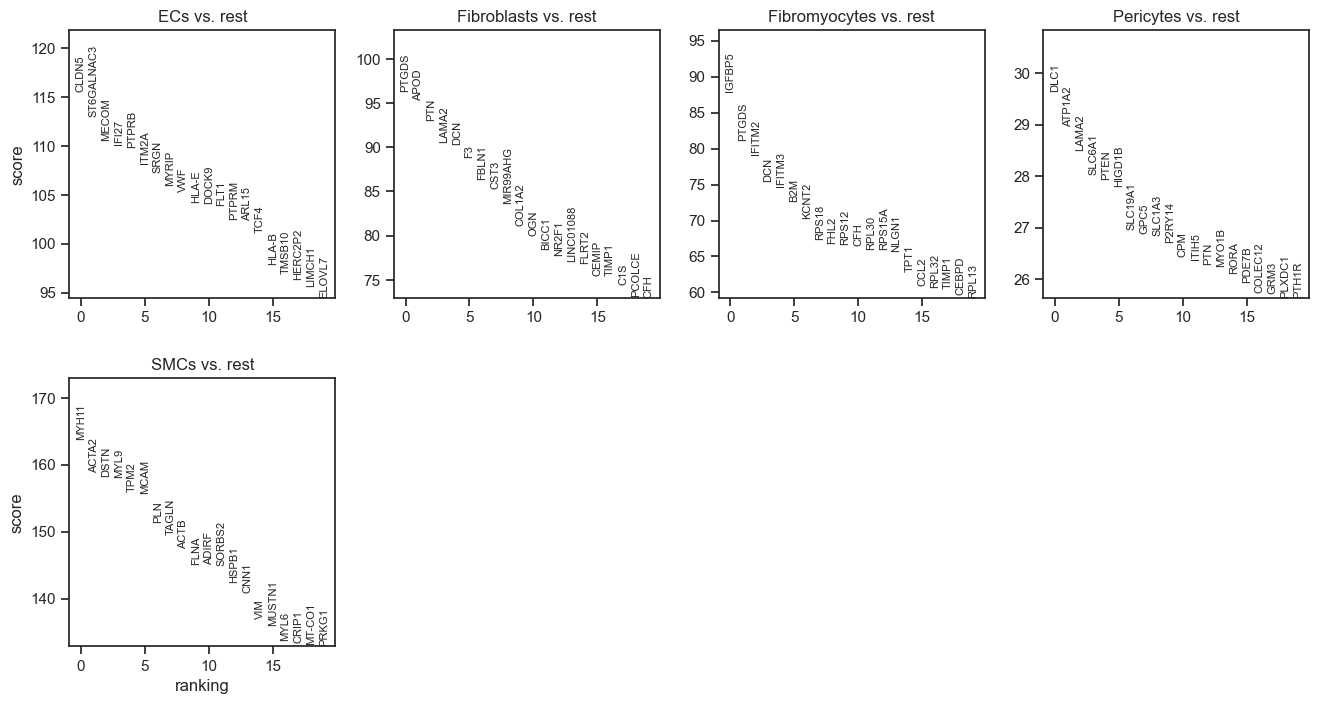

In [81]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

Export DEG table

In [107]:
import sys
sys.path.append(main_dir+"/Git/p6/p6-visium/visium-foxf2")
from p6_helper_functions import rank_genes_groups_df

In [108]:
# export DEG table
celltypes = adata.obs.clusters.unique().tolist()
merged_df = pd.DataFrame()
for group in celltypes:
    rank_df = rank_genes_groups_df(adata=adata, group=group, adj_pval_cutoff=None, log2fc_cutoff=None, sortby='zscore')
    merged_df = pd.concat([merged_df, rank_df])
    merged_df['reference'] = 'all other clusters'
merged_df.head(3)

divide by zero encountered in log10
divide by zero encountered in log10
divide by zero encountered in log10
divide by zero encountered in log10


,gene,log2FC,FC,pvals,pvals_adj,nlog10_pval_adj,zscore,group,reference
CLDN5,CLDN5,7.728694,212.113770,0.0,0.0,inf,115.524727,ECs,all other clusters
ST6GALNAC3,ST6GALNAC3,7.110999,138.236908,0.0,0.0,inf,112.986092,ECs,all other clusters
MECOM,MECOM,4.788053,27.627882,0.0,0.0,inf,110.516487,ECs,all other clusters


In [109]:
merged_df.group.unique().tolist()

['ECs', 'Fibromyocytes', 'SMCs', 'Fibroblasts', 'Pericytes']

In [110]:
# export as csv
merged_df.to_csv(main_dir+'/P6_Foxf2_per_celltype/DEA/'+ date.today().strftime("%Y%m%d")+'_DE_genes_Winkler2022.csv',sep=';')

# Focus on: Foxf2

In [111]:
gene="FOXF2"

## Plot

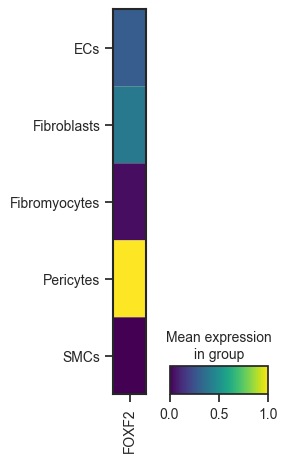

In [112]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

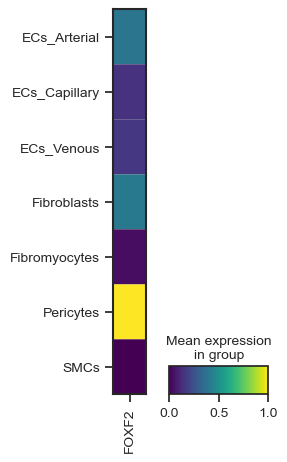

In [84]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

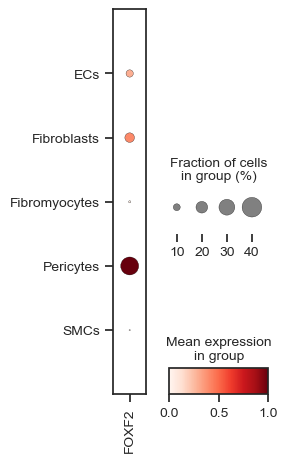

In [86]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

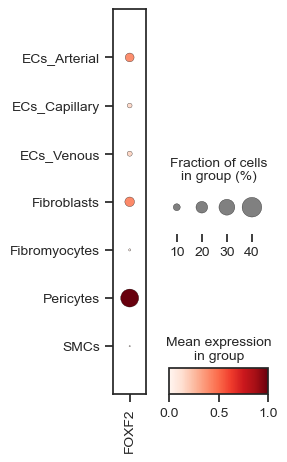

In [87]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

## Excl zonation

In [88]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

,mean_expression
clusters,
ECs,0.291276
Fibroblasts,0.403376
Fibromyocytes,0.033961
Pericytes,1.000000
SMCs,0.000000


In [89]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

,fraction_of_cells
clusters,
ECs,0.107273
Fibroblasts,0.153991
Fibromyocytes,0.021365
Pericytes,0.355623
SMCs,0.010474


In [90]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters,,,,,,
ECs,0.291276,0.107273,FOXF2,Winkler2022,Human,4950
Fibroblasts,0.403376,0.153991,FOXF2,Winkler2022,Human,3721
Fibromyocytes,0.033961,0.021365,FOXF2,Winkler2022,Human,4353
Pericytes,1.000000,0.355623,FOXF2,Winkler2022,Human,329
SMCs,0.000000,0.010474,FOXF2,Winkler2022,Human,41150


In [91]:
# export
name='Winkler2022'

In [92]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Foxf2_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+name+'_normalized.csv',sep=';')

## Incl zonation

In [93]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True).values_df
ex.columns = ['mean_expression']

In [94]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True).dot_size_df
fc.columns = ['fraction_of_cells']

In [96]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters2,,,,,,
ECs_Arterial,0.388578,0.136868,FOXF2,Winkler2022,Human,2886
ECs_Capillary,0.143142,0.060606,FOXF2,Winkler2022,Human,165
ECs_Venous,0.156274,0.066351,FOXF2,Winkler2022,Human,1899
Fibroblasts,0.403376,0.153991,FOXF2,Winkler2022,Human,3721
Fibromyocytes,0.033961,0.021365,FOXF2,Winkler2022,Human,4353
Pericytes,1.000000,0.355623,FOXF2,Winkler2022,Human,329
SMCs,0.000000,0.010474,FOXF2,Winkler2022,Human,41150


In [97]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+name+'_incl_zonation_normalized.csv',sep=';')

# Focus on: Other genes

## Foxo1

In [98]:
gene="FOXO1"

### Plot

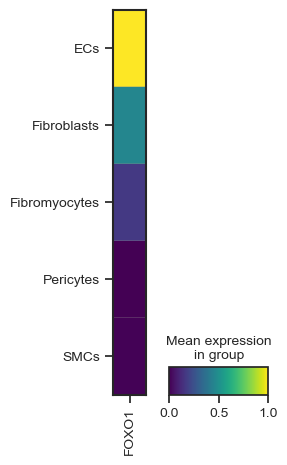

In [100]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

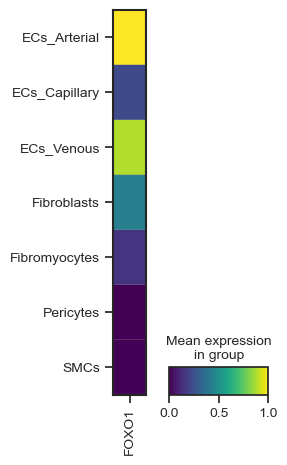

In [101]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

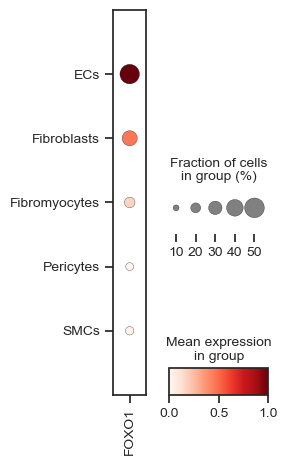

In [102]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

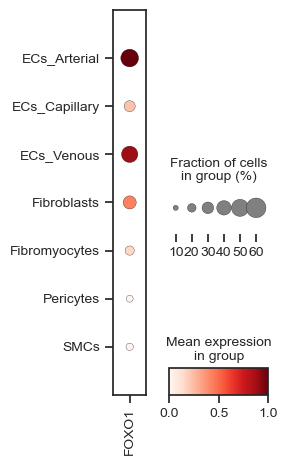

In [103]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [104]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

,mean_expression
clusters,
ECs,1.000000
Fibroblasts,0.460878
Fibromyocytes,0.164828
Pericytes,0.000000
SMCs,0.007659


In [105]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

,fraction_of_cells
clusters,
ECs,0.494949
Fibroblasts,0.349368
Fibromyocytes,0.218929
Pericytes,0.148936
SMCs,0.163183


In [106]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters,,,,,,
ECs,1.000000,0.494949,FOXO1,Winkler2022,Human,4950
Fibroblasts,0.460878,0.349368,FOXO1,Winkler2022,Human,3721
Fibromyocytes,0.164828,0.218929,FOXO1,Winkler2022,Human,4353
Pericytes,0.000000,0.148936,FOXO1,Winkler2022,Human,329
SMCs,0.007659,0.163183,FOXO1,Winkler2022,Human,41150


In [99]:
# export
name='Winkler2022'

In [107]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [108]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [109]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [110]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters2,,,,,,
ECs_Arterial,1.000000,0.523216,FOXO1,Winkler2022,Human,2886
ECs_Capillary,0.225253,0.278788,FOXO1,Winkler2022,Human,165
ECs_Venous,0.883314,0.470774,FOXO1,Winkler2022,Human,1899
Fibroblasts,0.428345,0.349368,FOXO1,Winkler2022,Human,3721
Fibromyocytes,0.153193,0.218929,FOXO1,Winkler2022,Human,4353
Pericytes,0.000000,0.148936,FOXO1,Winkler2022,Human,329
SMCs,0.007118,0.163183,FOXO1,Winkler2022,Human,41150


In [111]:
# export
name='Winkler2022'

In [112]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

## Tek = Tie2

In [113]:
gene="TEK"

### Plot

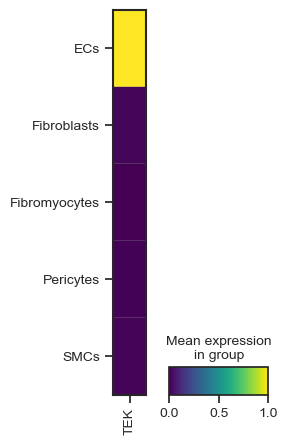

In [114]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

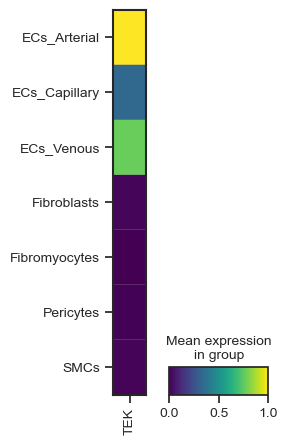

In [115]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

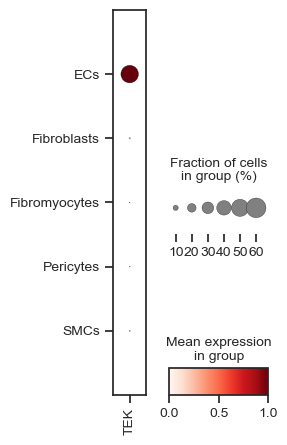

In [116]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

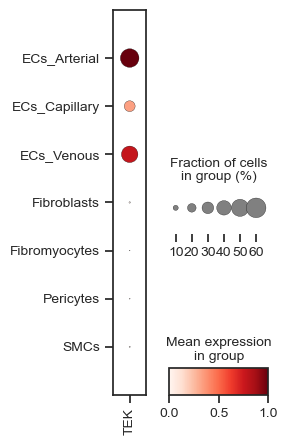

In [117]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [118]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

,mean_expression
clusters,
ECs,1.000000
Fibroblasts,0.014975
Fibromyocytes,0.000000
Pericytes,0.007327
SMCs,0.008887


In [119]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

,fraction_of_cells
clusters,
ECs,0.516566
Fibroblasts,0.018006
Fibromyocytes,0.006892
Pericytes,0.009119
SMCs,0.013730


In [120]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters,,,,,,
ECs,1.000000,0.516566,TEK,Winkler2022,Human,4950
Fibroblasts,0.014975,0.018006,TEK,Winkler2022,Human,3721
Fibromyocytes,0.000000,0.006892,TEK,Winkler2022,Human,4353
Pericytes,0.007327,0.009119,TEK,Winkler2022,Human,329
SMCs,0.008887,0.013730,TEK,Winkler2022,Human,41150


In [121]:
# export
name='Winkler2022'

In [122]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [123]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [124]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [125]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters2,,,,,,
ECs_Arterial,1.000000,0.557519,TEK,Winkler2022,Human,2886
ECs_Capillary,0.335242,0.272727,TEK,Winkler2022,Human,165
ECs_Venous,0.771136,0.475513,TEK,Winkler2022,Human,1899
Fibroblasts,0.013328,0.018006,TEK,Winkler2022,Human,3721
Fibromyocytes,0.000000,0.006892,TEK,Winkler2022,Human,4353
Pericytes,0.006521,0.009119,TEK,Winkler2022,Human,329
SMCs,0.007910,0.013730,TEK,Winkler2022,Human,41150


In [126]:
# export
name='Winkler2022'

In [127]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

## Nos3 = eNOS

In [128]:
gene="NOS3"

### Plot

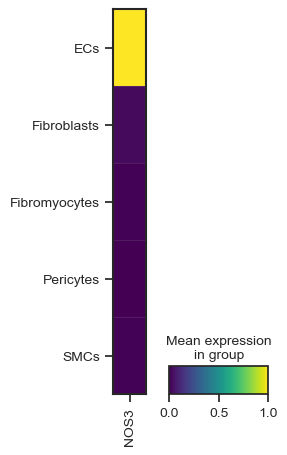

In [129]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

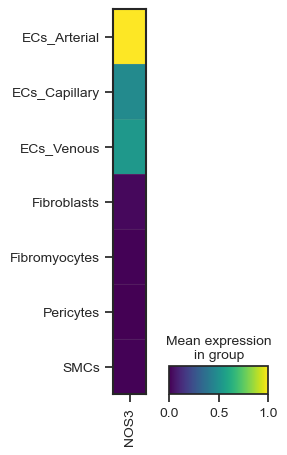

In [130]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

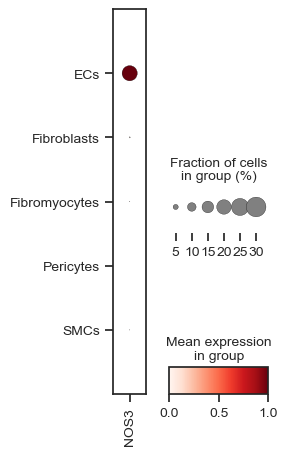

In [131]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

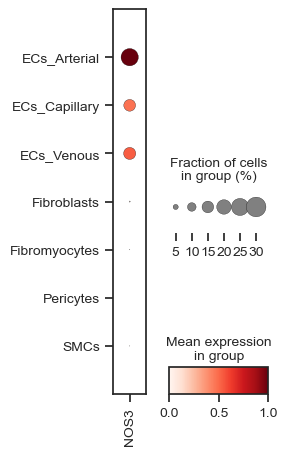

In [132]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [133]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

,mean_expression
clusters,
ECs,1.000000
Fibroblasts,0.026624
Fibromyocytes,0.007735
Pericytes,0.000000
SMCs,0.006522


In [134]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

,fraction_of_cells
clusters,
ECs,0.213131
Fibroblasts,0.006181
Fibromyocytes,0.001838
Pericytes,0.000000
SMCs,0.001555


In [135]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters,,,,,,
ECs,1.000000,0.213131,NOS3,Winkler2022,Human,4950
Fibroblasts,0.026624,0.006181,NOS3,Winkler2022,Human,3721
Fibromyocytes,0.007735,0.001838,NOS3,Winkler2022,Human,4353
Pericytes,0.000000,0.000000,NOS3,Winkler2022,Human,329
SMCs,0.006522,0.001555,NOS3,Winkler2022,Human,41150


In [136]:
# export
name='Winkler2022'

In [137]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [138]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [139]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [140]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters2,,,,,,
ECs_Arterial,1.000000,0.253292,NOS3,Winkler2022,Human,2886
ECs_Capillary,0.475248,0.151515,NOS3,Winkler2022,Human,165
ECs_Venous,0.533908,0.157451,NOS3,Winkler2022,Human,1899
Fibroblasts,0.021398,0.006181,NOS3,Winkler2022,Human,3721
Fibromyocytes,0.006217,0.001838,NOS3,Winkler2022,Human,4353
Pericytes,0.000000,0.000000,NOS3,Winkler2022,Human,329
SMCs,0.005242,0.001555,NOS3,Winkler2022,Human,41150


In [141]:
# export
name='Winkler2022'

In [142]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

## HTRA1

In [113]:
gene="HTRA1"

### Plot

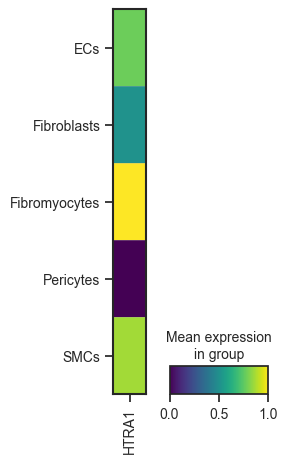

In [114]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

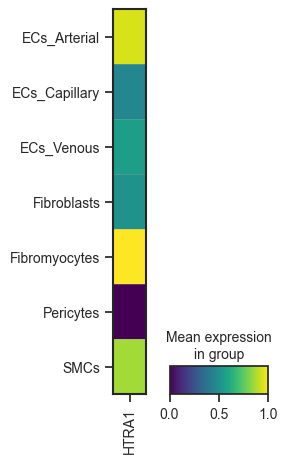

In [115]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


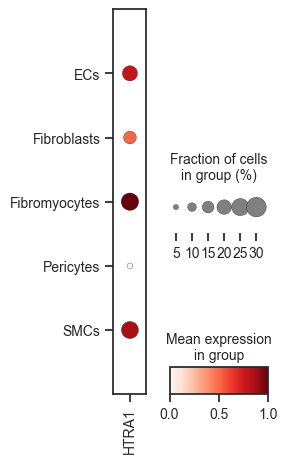

In [116]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


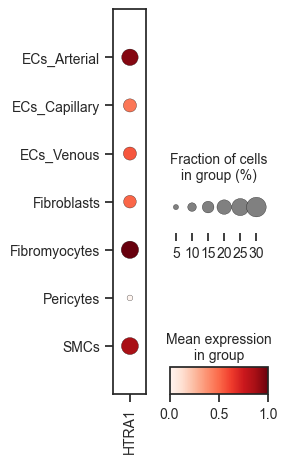

In [117]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [118]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

,mean_expression
clusters,
ECs,0.774885
Fibroblasts,0.508351
Fibromyocytes,1.000000
Pericytes,0.000000
SMCs,0.861332


In [119]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

,fraction_of_cells
clusters,
ECs,0.211515
Fibroblasts,0.167428
Fibromyocytes,0.254537
Pericytes,0.057751
SMCs,0.247582


In [120]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters,,,,,,
ECs,0.774885,0.211515,HTRA1,Winkler2022,Human,4950
Fibroblasts,0.508351,0.167428,HTRA1,Winkler2022,Human,3721
Fibromyocytes,1.000000,0.254537,HTRA1,Winkler2022,Human,4353
Pericytes,0.000000,0.057751,HTRA1,Winkler2022,Human,329
SMCs,0.861332,0.247582,HTRA1,Winkler2022,Human,41150


In [121]:
# export
name='Winkler2022'

In [122]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [123]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [124]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [125]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters2,,,,,,
ECs_Arterial,0.938232,0.237699,HTRA1,Winkler2022,Human,2886
ECs_Capillary,0.457648,0.175758,HTRA1,Winkler2022,Human,165
ECs_Venous,0.554204,0.174829,HTRA1,Winkler2022,Human,1899
Fibroblasts,0.508351,0.167428,HTRA1,Winkler2022,Human,3721
Fibromyocytes,1.000000,0.254537,HTRA1,Winkler2022,Human,4353
Pericytes,0.000000,0.057751,HTRA1,Winkler2022,Human,329
SMCs,0.861332,0.247582,HTRA1,Winkler2022,Human,41150


In [126]:
# export
name='Winkler2022'

In [127]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

## EGFL8

In [128]:
gene="EGFL8"

### Plot

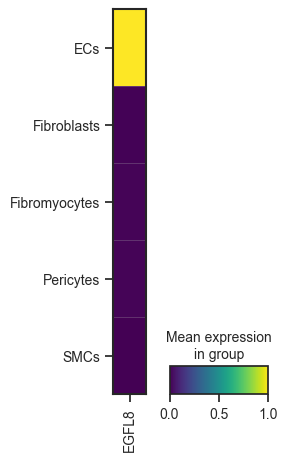

In [129]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

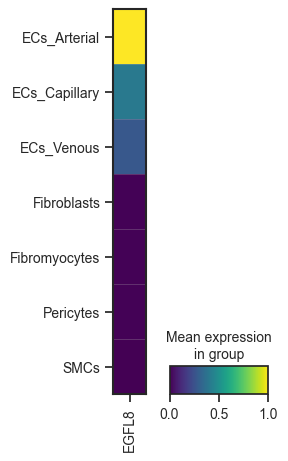

In [130]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


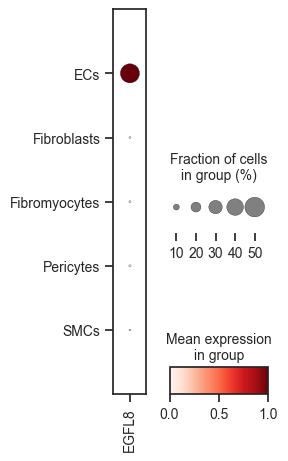

In [131]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


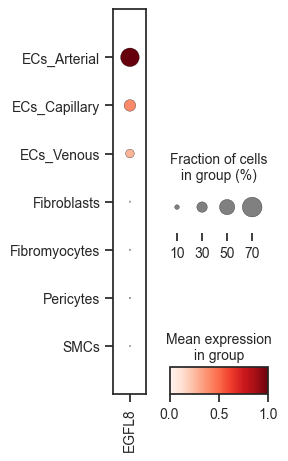

In [132]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [133]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

,mean_expression
clusters,
ECs,1.000000
Fibroblasts,0.005712
Fibromyocytes,0.008027
Pericytes,0.010046
SMCs,0.000000


In [134]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

,fraction_of_cells
clusters,
ECs,0.481414
Fibroblasts,0.023650
Fibromyocytes,0.025270
Pericytes,0.027356
SMCs,0.020826


In [135]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters,,,,,,
ECs,1.000000,0.481414,EGFL8,Winkler2022,Human,4950
Fibroblasts,0.005712,0.023650,EGFL8,Winkler2022,Human,3721
Fibromyocytes,0.008027,0.025270,EGFL8,Winkler2022,Human,4353
Pericytes,0.010046,0.027356,EGFL8,Winkler2022,Human,329
SMCs,0.000000,0.020826,EGFL8,Winkler2022,Human,41150


In [136]:
# export
name='Winkler2022'

In [137]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [138]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [139]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [140]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters2,,,,,,
ECs_Arterial,1.000000,0.650728,EGFL8,Winkler2022,Human,2886
ECs_Capillary,0.405907,0.345455,EGFL8,Winkler2022,Human,165
ECs_Venous,0.269885,0.235914,EGFL8,Winkler2022,Human,1899
Fibroblasts,0.003999,0.023650,EGFL8,Winkler2022,Human,3721
Fibromyocytes,0.005620,0.025270,EGFL8,Winkler2022,Human,4353
Pericytes,0.007033,0.027356,EGFL8,Winkler2022,Human,329
SMCs,0.000000,0.020826,EGFL8,Winkler2022,Human,41150


In [141]:
# export
name='Winkler2022'

In [142]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

# Session Info

In [143]:
sc.logging.print_versions()

-----
anndata     0.9.1
scanpy      1.9.2
-----
PIL                         9.4.0
PyQt5                       NA
adjustText                  0.8
appnope                     0.1.2
asciitree                   NA
asttokens                   NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
bottleneck                  1.3.5
brotli                      NA
certifi                     2022.12.07
cffi                        1.15.1
charset_normalizer          2.0.4
cloudpickle                 2.2.1
comm                        0.1.2
cycler                      0.10.0
cython_runtime              NA
dask                        2023.2.1
dask_image                  2022.09.0
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
docrep                      0.3.2
entrypoints                 0.4
executing                   0.8.3
fasteners                   0.18
h5py        